# Báo cáo cuối kỳ môn Lập trình xử lý dữ liệu

# 1. Các bước đầu 

### 1.1. Import các thư viện

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib as mpl
import ta


### 1.2. Chọn cổ phiếu

Cổ phiếu Coca-Cola (KO) đại diện cho một doanh nghiệp lớn, ổn định, có dữ liệu lịch sử phong phú và đáng tin cậy. Mức độ biến động giá vừa phải giúp dễ quan sát xu hướng và áp dụng các chỉ báo kỹ thuật. Ngoài ra, đây là thương hiệu toàn cầu quen thuộc nên rất thuận lợi để viết phần giới thiệu và đưa ra nhận định.


# 2. Thu thập dữ liệu 

### 2.1. Sử dụng Python với thư viện yfinance để lấy dữ liệu hàng ngày (Open, High, Low, Close, Volume)

In [9]:
# Mã cổ phiếu Coca-Cola
symbol = "KO"

# Lấy dữ liệu trong 5 năm gần nhất
df = yf.Ticker(symbol).history(period="5y").reset_index()

# Chuyển cột Date sang định dạng thời gian
df['Date'] = pd.to_datetime(df['Date'])


### 2.2. Xuất dữ liệu ra file CSV và xem


In [15]:
df.to_csv("KO_raw_data.csv", index=False, encoding="utf-8-sig")
#xem 5 dòng đầu tiên
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00-04:00,41.048156,41.065342,39.544403,39.544403,30464600,0.0,0.0
1,2020-06-22 00:00:00-04:00,39.553005,39.656122,38.994470,39.303814,20876200,0.0,0.0
2,2020-06-23 00:00:00-04:00,39.527228,39.776422,39.166329,39.217884,14675300,0.0,0.0
3,2020-06-24 00:00:00-04:00,38.985868,39.046018,38.238289,38.367184,17631800,0.0,0.0
4,2020-06-25 00:00:00-04:00,38.212520,38.650756,37.834432,38.607792,13829700,0.0,0.0


# 3. Làm sạch và tiền xử lý

### 3.1. Kiểm tra giá trị thiếu

Theo NYSE, nơi cổ phiếu Coca-Cola (KO) được niêm yết, sàn tiến hành giao dịch từ thứ Hai đến thứ Sáu, trừ các ngày nghỉ lễ theo lịch của Hoa Kỳ. Với những ngày nghỉ, tổng khối lượng giao dịch (Volume) sẽ bằng 0.
Do đó, ta cần tìm và loại bỏ những ngày này để đảm bảo dữ liệu chỉ chứa các phiên giao dịch hợp lệ.

In [13]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("KO_raw_data.csv")

# Loại bỏ các ngày có Volume = 0
df = df[df['Volume'] > 0]

# Hiển thị 5 dòng đầu tiên
print(df.head())

                        Date       Open       High        Low      Close  \
0  2020-06-19 00:00:00-04:00  41.048156  41.065342  39.544403  39.544403   
1  2020-06-22 00:00:00-04:00  39.553005  39.656122  38.994470  39.303814   
2  2020-06-23 00:00:00-04:00  39.527228  39.776422  39.166329  39.217884   
3  2020-06-24 00:00:00-04:00  38.985868  39.046018  38.238289  38.367184   
4  2020-06-25 00:00:00-04:00  38.212520  38.650756  37.834432  38.607792   

     Volume  Dividends  Stock Splits  
0  30464600        0.0           0.0  
1  20876200        0.0           0.0  
2  14675300        0.0           0.0  
3  17631800        0.0           0.0  
4  13829700        0.0           0.0  


NYSE có các phiên giao dịch nửa ngày (thường kết thúc lúc 1:00 PM) vào dịp lễ như trước Giáng sinh hoặc sau Lễ Tạ ơn. Những phiên này thường có khối lượng giao dịch thấp và có thể gây nhiễu dữ liệu. Ngoài ra, giao dịch còn có thể gián đoạn do sự kiện bất thường như “circuit breaker”, sự cố kỹ thuật, hay thiên tai. Vì vậy, cần loại bỏ các phiên nửa ngày khỏi dữ liệu.











In [19]:
# Danh sách các ngày giao dịch nửa ngày
half_day_dates = [
    "2020-11-27", "2020-12-24", "2021-11-26", "2021-12-24", "2022-11-25",
    "2022-12-24", "2023-07-03", "2023-11-24", "2023-12-24", "2024-07-03",
    "2024-11-29", "2024-12-24", "2025-07-03", "2025-11-28", "2025-12-24"
]

# Chuyển half-day thành datetime dạng ngày
half_day_dates = pd.to_datetime(half_day_dates, utc=True).normalize()

# Ép cột Date về datetime và chuẩn hóa về UTC + normalize
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.normalize()

# Loại bỏ các ngày nửa ngày
df = df[~df['Date'].isin(half_day_dates)]

# In 5 dòng đầu
print(df.head())


                       Date       Open       High        Low      Close  \
0 2020-06-19 00:00:00+00:00  41.048156  41.065342  39.544403  39.544403   
1 2020-06-22 00:00:00+00:00  39.553005  39.656122  38.994470  39.303814   
2 2020-06-23 00:00:00+00:00  39.527228  39.776422  39.166329  39.217884   
3 2020-06-24 00:00:00+00:00  38.985868  39.046018  38.238289  38.367184   
4 2020-06-25 00:00:00+00:00  38.212520  38.650756  37.834432  38.607792   

     Volume  Dividends  Stock Splits  
0  30464600        0.0           0.0  
1  20876200        0.0           0.0  
2  14675300        0.0           0.0  
3  17631800        0.0           0.0  
4  13829700        0.0           0.0  


### 3.2. Kiểm tra trùng lặp

In [21]:
print("Đã loại bỏ trùng" if df.duplicated().any() else "Không có dòng trùng")
df = df.drop_duplicates()


Không có dòng trùng


### 3.3. Chuyển cột ngày tháng về định dạng datetime

Cột Date cần được chuyển về định dạng datetime để thuận tiện cho việc phân tích thời gian trong các bước tiếp theo.

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

                       Date       Open       High        Low      Close  \
0 2020-06-19 00:00:00+00:00  41.048156  41.065342  39.544403  39.544403   
1 2020-06-22 00:00:00+00:00  39.553005  39.656122  38.994470  39.303814   
2 2020-06-23 00:00:00+00:00  39.527228  39.776422  39.166329  39.217884   
3 2020-06-24 00:00:00+00:00  38.985868  39.046018  38.238289  38.367184   
4 2020-06-25 00:00:00+00:00  38.212520  38.650756  37.834432  38.607792   

     Volume  Dividends  Stock Splits  
0  30464600        0.0           0.0  
1  20876200        0.0           0.0  
2  14675300        0.0           0.0  
3  17631800        0.0           0.0  
4  13829700        0.0           0.0  


### 3.4. Sort data theo ngày 

Sắp xếp dữ liệu theo cột Date để đảm bảo thứ tự thời gian tăng dần, hỗ trợ cho các phân tích chuỗi thời gian sau này

In [25]:
df = df.sort_values('Date')
print(df.head())

                       Date       Open       High        Low      Close  \
0 2020-06-19 00:00:00+00:00  41.048156  41.065342  39.544403  39.544403   
1 2020-06-22 00:00:00+00:00  39.553005  39.656122  38.994470  39.303814   
2 2020-06-23 00:00:00+00:00  39.527228  39.776422  39.166329  39.217884   
3 2020-06-24 00:00:00+00:00  38.985868  39.046018  38.238289  38.367184   
4 2020-06-25 00:00:00+00:00  38.212520  38.650756  37.834432  38.607792   

     Volume  Dividends  Stock Splits  
0  30464600        0.0           0.0  
1  20876200        0.0           0.0  
2  14675300        0.0           0.0  
3  17631800        0.0           0.0  
4  13829700        0.0           0.0  


### 3.5. Kiểm tra và loại bỏ bất thường 

Sau khi loại bỏ các ngày nghỉ và phiên giao dịch nửa ngày, các giá trị bất thường (outliers) còn lại có thể xuất phát từ biến động giá bất chợt do tâm lý thị trường hoặc các sự kiện bất ngờ, không phản ánh giá trị thực của cổ phiếu. Ta sử dụng phương pháp tứ phân vị (IQR) để xác định và loại bỏ các outliers trong cột Close.

In [26]:
# Sắp xếp dữ liệu theo cột Close
df1 = df.sort_values("Close")

# Tính Q1, Q3 và IQR
Q1 = df1["Close"].quantile(0.25)
Q3 = df1["Close"].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng low và up theo Tukey Range Test
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

# Loại bỏ outliers
df = df[(df["Close"] >= low) & (df["Close"] <= up)]

# Hiển thị 5 dòng đầu tiên
print(df.head())

                       Date       Open       High        Low      Close  \
0 2020-06-19 00:00:00+00:00  41.048156  41.065342  39.544403  39.544403   
1 2020-06-22 00:00:00+00:00  39.553005  39.656122  38.994470  39.303814   
2 2020-06-23 00:00:00+00:00  39.527228  39.776422  39.166329  39.217884   
3 2020-06-24 00:00:00+00:00  38.985868  39.046018  38.238289  38.367184   
4 2020-06-25 00:00:00+00:00  38.212520  38.650756  37.834432  38.607792   

     Volume  Dividends  Stock Splits  
0  30464600        0.0           0.0  
1  20876200        0.0           0.0  
2  14675300        0.0           0.0  
3  17631800        0.0           0.0  
4  13829700        0.0           0.0  


### 3.6 . Xuất dữ liệu đã làm sạch ra file CSV

In [27]:
df.to_csv("KO_processed_data.csv", index=False)

### Tóm lại: Kết luận sau khi làm sạch & tiền xử lý dữ liệu cổ phiếu KO
Dữ liệu không có giá trị thiếu hay trùng lặp, cho thấy chất lượng cao từ yfinance.

Các ngày có Volume = 0 (ngày nghỉ lễ) và các phiên giao dịch nửa ngày đã được loại bỏ để tránh gây nhiễu.

Cột ngày (Date) được chuyển về định dạng datetime và sắp xếp theo thứ tự thời gian, phục vụ phân tích chuỗi thời gian.

Outliers trong cột Close được kiểm tra bằng phương pháp IQR, không phát hiện điểm bất thường rõ rệt.

Cổ tức (Dividends) đã được xử lý bằng cách tạo cột Adjusted_Close phản ánh giá trị thực của cổ phiếu. Không có chia tách cổ phiếu.

Dữ liệu sạch, đáng tin cậy và sẵn sàng cho các bước phân tích kỹ thuật như SMA, EMA, RSI, lợi suất,...












# 4.Tính toán chỉ số kỹ thuật cơ bản

### 4.1 Tính toán Đường trung bình động đơn giản (SMA) với khoảng 20 và 50 ngày

In [34]:
print("Tính toán SMA_20 và SMA_50...")
# Kiểm tra các cột cần thiết có tồn tại
required_columns = ['Close', 'Dividends']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong DataFrame. Vui lòng kiểm tra dữ liệu đầu vào.")
# Tạo cột Adjusted_Close (giá đã điều chỉnh dựa trên cổ tức)
if 'Adjusted_Close' not in df.columns:
    print("Tạo cột Adjusted_Close...")
    df['Adjusted_Close'] = df['Close'] - df['Dividends']
# Kiểm tra số lượng dòng dữ liệu
if len(df) < 50:
    raise ValueError(f"Dữ liệu chỉ có {len(df)} dòng, không đủ để tính SMA_50 (yêu cầu ít nhất 50 dòng).")
# Tính SMA_20: Trung bình giá Adjusted_Close trong 20 ngày, phản ánh xu hướng ngắn hạn
df['SMA_20'] = df['Adjusted_Close'].rolling(window=20, min_periods=20).mean()
# Tính SMA_50: Trung bình giá Adjusted_Close trong 50 ngày, phản ánh xu hướng trung hạn
df['SMA_50'] = df['Adjusted_Close'].rolling(window=50, min_periods=50).mean()
# Hiển thị 5 dòng cuối để kiểm tra
print("\nKết quả SMA_20 và SMA_50 (5 dòng cuối):")
print(df[['Date', 'Adjusted_Close', 'SMA_20', 'SMA_50']].tail().to_string(index=False))

### 4.2 Tính toán Đường trung bình động hàm mũ (EMA) với khoảng 20 ngày

In [36]:
print("Tính toán EMA_20...")

# Kiểm tra cột Adjusted_Close có tồn tại
if 'Adjusted_Close' not in df.columns:
    if 'Close' not in df.columns or 'Dividends' not in df.columns:
        raise KeyError("Cột 'Close' hoặc 'Dividends' không tồn tại để tạo Adjusted_Close.")
    print("Tạo cột Adjusted_Close...")
    df['Adjusted_Close'] = df['Close'] - df['Dividends']

# Kiểm tra số lượng dòng dữ liệu
if len(df) < 20:
    raise ValueError(f"Dữ liệu chỉ có {len(df)} dòng, không đủ để tính EMA_20 (yêu cầu ít nhất 20 dòng).")

# Tính EMA_20: Trung bình hàm mũ giá Adjusted_Close trong 20 ngày, nhạy hơn với biến động gần đây
df['EMA_20'] = df['Adjusted_Close'].ewm(span=20, adjust=False, min_periods=20).mean()

# Hiển thị 5 dòng cuối để kiểm tra
print("\nKết quả EMA_20 (5 dòng cuối):")
print(df[['Date', 'Adjusted_Close', 'EMA_20']].tail().to_string(index=False))

Tính toán EMA_20...

Kết quả EMA_20 (5 dòng cuối):
                     Date  Adjusted_Close    EMA_20
2025-06-12 00:00:00+00:00       71.729996 71.131785
2025-06-13 00:00:00+00:00       70.509997 71.072567
2025-06-16 00:00:00+00:00       70.519997 71.019941
2025-06-17 00:00:00+00:00       69.620003 70.886614
2025-06-18 00:00:00+00:00       69.209999 70.726936


### 4.3 Chỉ số sức mạnh tương đối RSI.

In [38]:
print("Tính toán RSI_14...")

# Kiểm tra cột Adjusted_Close có tồn tại
if 'Adjusted_Close' not in df.columns:
    if 'Close' not in df.columns or 'Dividends' not in df.columns:
        raise KeyError("Cột 'Close' hoặc 'Dividends' không tồn tại để tạo Adjusted_Close.")
    print("Tạo cột Adjusted_Close...")
    df['Adjusted_Close'] = df['Close'] - df['Dividends']

# Kiểm tra số lượng dòng dữ liệu
if len(df) < 14:
    raise ValueError(f"Dữ liệu chỉ có {len(df)} dòng, không đủ để tính RSI_14 (yêu cầu ít nhất 14 dòng).")

# Định nghĩa hàm tính RSI
def compute_rsi(data, period=14):
    delta = data.diff()  # Tính chênh lệch giá
    gain = delta.where(delta > 0, 0)  # Giá tăng
    loss = -delta.where(delta < 0, 0)  # Giá giảm
    avg_gain = gain.rolling(window=period, min_periods=period).mean()  # Trung bình giá tăng
    avg_loss = loss.rolling(window=period, min_periods=period).mean()  # Trung bình giá giảm
    rs = avg_gain / avg_loss  # Tỷ lệ sức mạnh
    rsi = 100 - (100 / (1 + rs))  # Công thức RSI
    return rsi

# Tính RSI_14 cho cột Adjusted_Close
df['RSI_14'] = compute_rsi(df['Adjusted_Close'], period=14)

# Hiển thị 5 dòng cuối để kiểm tra (thay vì giới hạn 14 dòng)
print("\nKết quả RSI_14 (5 dòng cuối):")
print(df[['Date', 'Adjusted_Close', 'RSI_14']].tail().to_string(index=False))

Tính toán RSI_14...

Kết quả RSI_14 (5 dòng cuối):
                     Date  Adjusted_Close    RSI_14
2025-06-12 00:00:00+00:00       71.729996 59.615413
2025-06-13 00:00:00+00:00       70.509997 43.996557
2025-06-16 00:00:00+00:00       70.519997 43.997150
2025-06-17 00:00:00+00:00       69.620003 42.153264
2025-06-18 00:00:00+00:00       69.209999 36.593398


# 5. Phân tích dữ liệu:

### 5.1 Tính lợi suất ngày

Lợi suất ngày đo lường mức thay đổi tương đối của giá cổ phiếu giữa hai phiên giao dịch liên tiếp. Đây là chỉ số cơ bản nhưng quan trọng để đánh giá hiệu suất ngắn hạn và mức độ biến động của cổ phiếu.



Tính toán lợi suất ngày và trực quan hóa...


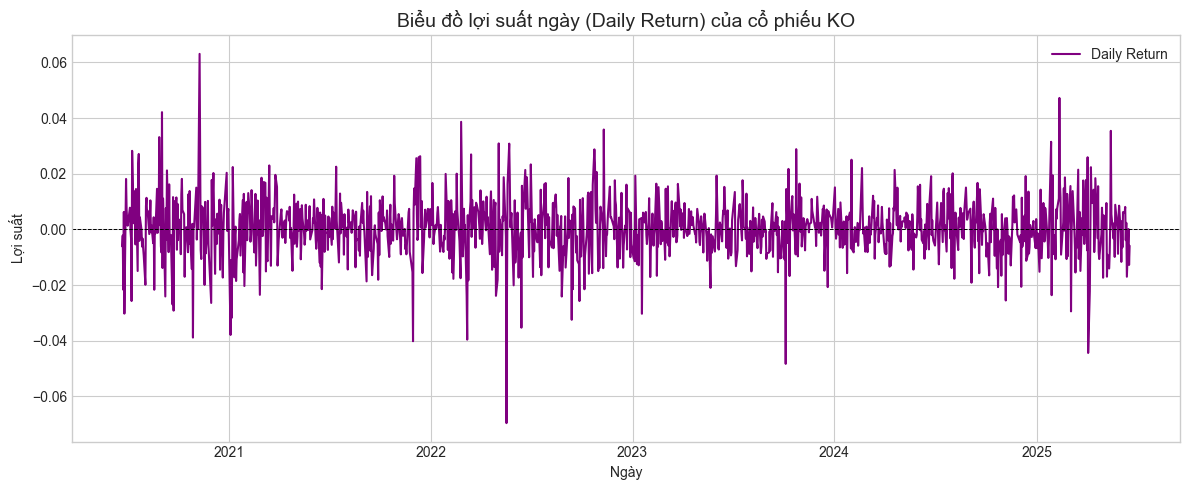

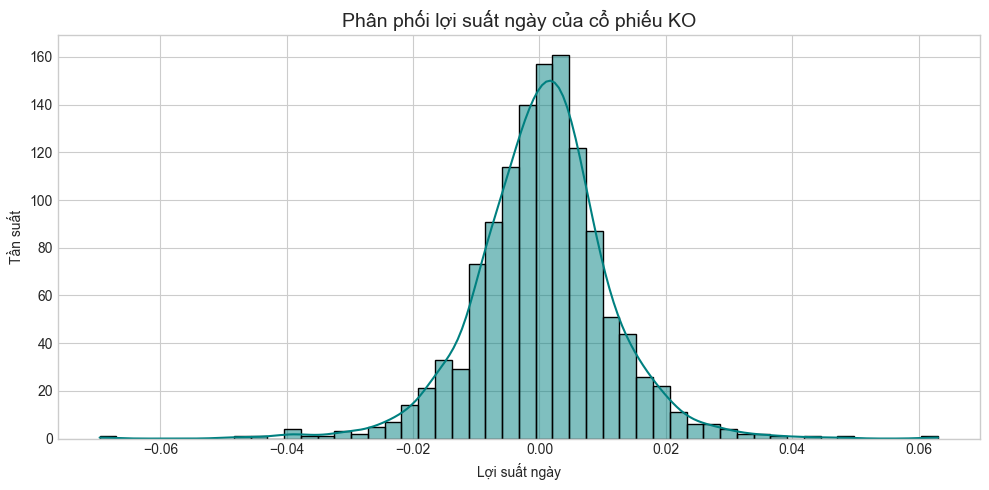

In [40]:
print("Tính toán lợi suất ngày và trực quan hóa...")

# Tạo Adjusted_Close nếu chưa có
if 'Adjusted_Close' not in df.columns:
    if 'Close' not in df.columns or 'Dividends' not in df.columns:
        raise KeyError("Thiếu cột 'Close' hoặc 'Dividends' để tính Adjusted_Close.")
    df['Adjusted_Close'] = df['Close'] - df['Dividends']

# Tính lợi suất ngày
df['Daily_Return'] = df['Adjusted_Close'].pct_change()

# Thiết lập style
plt.style.use('seaborn-v0_8-whitegrid')

# Vẽ biểu đồ đường Daily Return theo thời gian
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Daily_Return'], color='purple', label='Daily Return')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.title("Biểu đồ lợi suất ngày (Daily Return) của cổ phiếu KO", fontsize=14)
plt.xlabel("Ngày")
plt.ylabel("Lợi suất")
plt.legend()
plt.tight_layout()
plt.show()

# Vẽ histogram phân phối Daily Return
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='teal')
plt.title("Phân phối lợi suất ngày của cổ phiếu KO", fontsize=14)
plt.xlabel("Lợi suất ngày")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()


### Biểu đồ thời gian – Daily Return
- Biên độ dao động lợi suất chủ yếu dao động từ -2% đến +2%, tức là biến động không quá mạnh, phản ánh đúng bản chất một cổ phiếu "blue-chip" ổn định như Coca-Cola.

- Có vài điểm spike lên tới +6% hoặc rơi xuống gần -6%, thường là do tin tức đột biến (ví dụ như báo cáo tài chính, chính sách cổ tức, hoặc sự kiện thị trường toàn cầu).

- Mật độ biến động ổn định hơn từ 2022–2025, cho thấy thị trường đã "price in" phần lớn các yếu tố rủi ro sau dịch COVID-19.

### Histogram – Phân phối lợi suất ngày
- Phân phối gần giống chuẩn (normal distribution), với phần lớn các giá trị tập trung quanh lợi suất = 0.

- Tuy nhiên, đuôi bên trái hơi dài hơn (leptokurtic và left-skewed nhẹ) → dấu hiệu có thể có một số cú sụt mạnh bất ngờ hơn so với tăng mạnh.

- Điều này phù hợp với tâm lý thị trường tài chính, nơi nhà đầu tư thường phản ứng mạnh với tin xấu hơn là tin tốt.



### 5.2 Tính độ biến động (Volatility) theo tháng và quý

C:\Users\lebin\AppData\Local\Temp\ipykernel_20476\4218851897.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = df['Daily_Return'].resample('M').std() * np.sqrt(21)
C:\Users\lebin\AppData\Local\Temp\ipykernel_20476\4218851897.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_volatility = df['Daily_Return'].resample('Q').std() * np.sqrt(63)


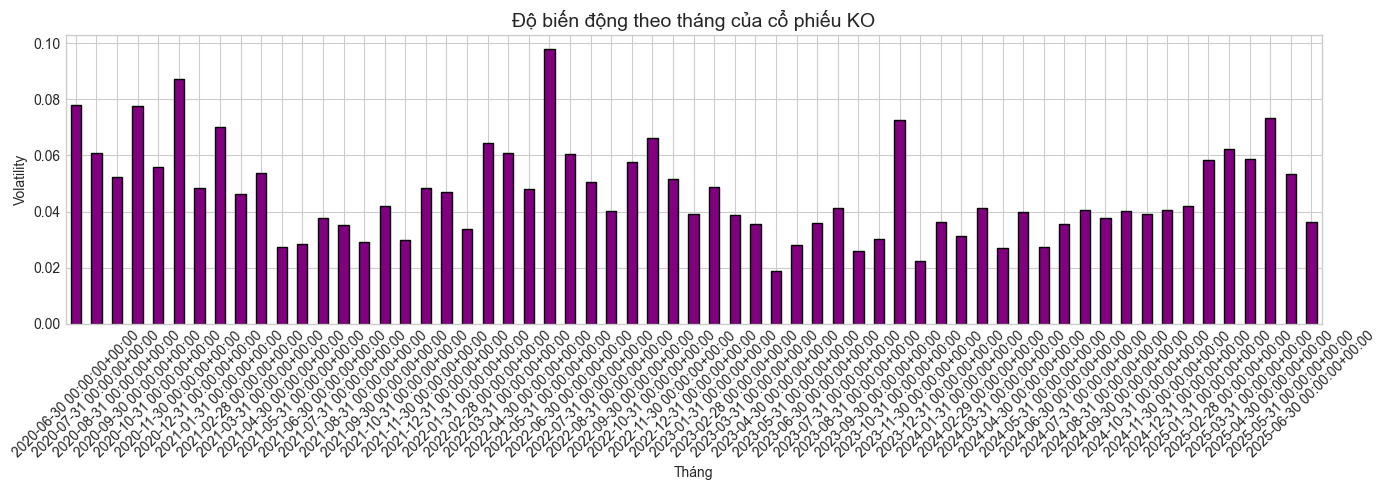

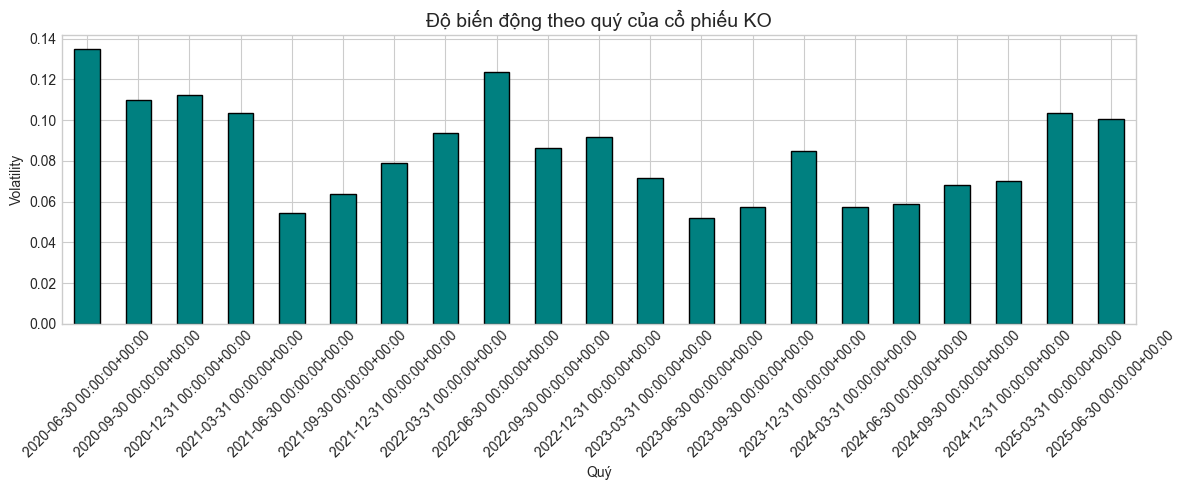

In [44]:
import matplotlib.pyplot as plt

# Đảm bảo 'Date' là index datetime, nếu chưa thì xử lý
if df.index.name != 'Date':
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    df.index = pd.to_datetime(df.index)

# Nếu chưa có Daily_Return thì tính
if 'Daily_Return' not in df.columns:
    df['Daily_Return'] = df['Adjusted_Close'].pct_change()

# Tính volatility theo tháng
monthly_volatility = df['Daily_Return'].resample('M').std() * np.sqrt(21)

# Tính volatility theo quý
quarterly_volatility = df['Daily_Return'].resample('Q').std() * np.sqrt(63)

# Biểu đồ độ biến động theo tháng
plt.figure(figsize=(14, 5))
monthly_volatility.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Độ biến động theo tháng của cổ phiếu KO", fontsize=14)
plt.ylabel("Volatility")
plt.xlabel("Tháng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biểu đồ độ biến động theo quý
plt.figure(figsize=(12, 5))
quarterly_volatility.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Độ biến động theo quý của cổ phiếu KO", fontsize=14)
plt.ylabel("Volatility")
plt.xlabel("Quý")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Nhận xét về độ biến động theo tháng (biểu đồ 1):
- Biến động khá dao động qua các tháng – không có quy luật rõ ràng nhưng vẫn có một số điểm nhấn:

- Tháng 10/2022 có mức độ biến động cao đột biến – có thể do một sự kiện bất ngờ, ví dụ: báo cáo tài chính, tin tức kinh tế vĩ mô, hoặc Fed phát biểu.

- Giai đoạn cuối 2023 - đầu 2024: mức biến động nhìn chung thấp hơn, thị trường có vẻ ổn định hoặc nhà đầu tư ít phản ứng mạnh.

- Từ giữa 2024 đến 2025, mức biến động lại tăng dần, cho thấy thị trường có thể đang bước vào một giai đoạn nhạy cảm hơn.

- Dao động không đều, phản ánh rằng thị trường KO không ổn định đều hàng tháng mà có lúc "rung lắc", lúc "ngủ yên".

### Nhận xét về độ biến động theo quý (biểu đồ 2):
- Quý 3/2020 và quý 2/2022 là hai điểm nhấn có volatility cao nhất.

- Có thể liên quan đến các biến động thị trường toàn cầu (ví dụ: COVID-19 hậu kỳ, khủng hoảng chuỗi cung ứng, hoặc bất ổn tài chính).

- Trong các quý này, giá có thể tăng giảm nhanh khiến nhà đầu tư cần đặc biệt cảnh giác.

- Từ năm 2023 trở đi, các quý nhìn chung có mức biến động thấp và ổn định hơn, trừ quý 1/2025 và quý 4/2024 có phần tăng nhẹ.

- Có thể là dấu hiệu tích cực nếu ta xem xét cổ phiếu KO như một tài sản phòng thủ – ổn định, ít “drama”.



### 5.3. Phân tích tương quan giữa giá đóng cửa và các chỉ số SMA, RSI.

### Phần 1: Ma trận tương quan và biểu đồ heatmap


In [51]:
!pip install ta


  Using cached ta-0.11.0-py3-none-any.whl



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


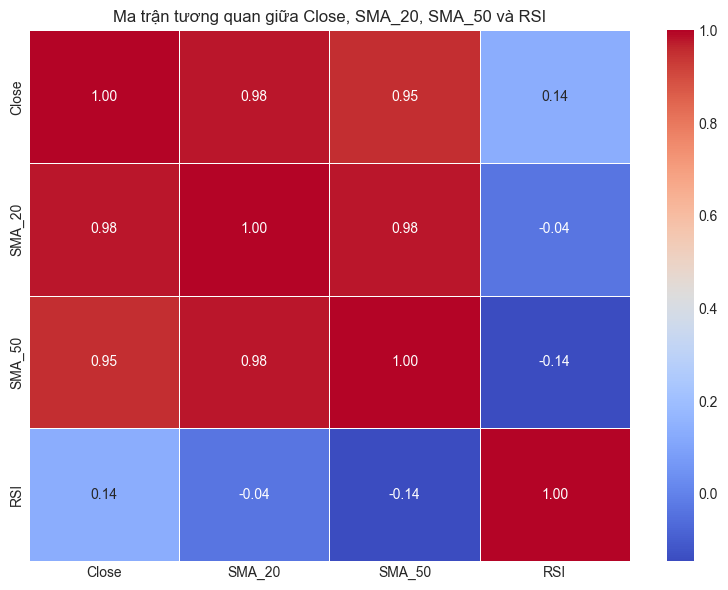

In [57]:
# Nếu Date đã là index, không cần set lại nữa
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
# Chuẩn bị dữ liệu phân tích tương quan
corr_data = df[['Close', 'SMA_20', 'SMA_50', 'RSI']].dropna()

# Tính và vẽ heatmap
correlation_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa Close, SMA_20, SMA_50 và RSI')
plt.tight_layout()
plt.show()


## Phân tích cụ thể:
### 1. Close – SMA_20: 0.98
→ Tương quan cực kỳ mạnh và dương
  Giá đóng cửa gần như bám sát đường trung bình SMA_20. Điều này là hợp lý vì SMA_20 là trung bình trượt của chính giá Close.
  SMA càng ngắn thì càng nhạy với giá hiện tại → tương quan cao là chuyện đương nhiên.
### 2. Close – SMA_50: 0.95
→ Cũng rất cao, nhưng thấp hơn SMA_20 một chút.
  Vì SMA_50 lấy trung bình dài hơn nên phản ứng chậm hơn → ít nhạy hơn với biến động tức thời của giá.
### 3. Close – SMA_50: 0.95
→ Cũng rất cao, nhưng thấp hơn SMA_20 một chút.
  Vì SMA_50 lấy trung bình dài hơn nên phản ứng chậm hơn → ít nhạy hơn với biến động tức thời của giá.
  
### 4. SMA_20 – SMA_50: 0.98
→ Cặp đôi này cực kỳ khắng khít luôn.
  Dễ hiểu vì cả hai đều là trung bình của cùng một giá trị (Close), chỉ khác nhau độ dài khung thời gian. SMA_20 thường dao động quanh SMA_50, nhưng     gần như không lệch trend nhiều.

### 5. RSI và phần còn lại:
   RSI – Close: 0.14
   RSI – SMA_20: -0.04
   RSI – SMA_50: -0.14
=> Nhìn vào đây thấy RSI gần như không tương quan tuyến tính rõ rệt với Close và các SMA. Có thể:
- RSI phản ứng với tốc độ thay đổi chứ không phải giá tuyệt đối.
- RSI là một chỉ báo dao động (oscillator), không phải theo xu hướng (trend-following), nên mối tương quan với giá là phi tuyến tính.

